In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Results of poisoning attack

In [ ]:
# Change this to point to the data directory
base_path = ""

In [3]:
readable = {
    "trigger_type": "Trigger",
    "trig": "Trigger",
    "full": "Full trigger",
    "red": "Reduced trigger",
    "gen": "Generated trigger",
    0: "",
    None: "No poison",
    "shap": "SHAP",
    "random": "Random",
    "entropy": "Entropy",
    "gini": "Gini",
    "fstrat": "Feature selection",
    "poison_asr_poison": "ASR",
    "GradientBoosting": "Gradient Boosting",
    "FFNN": "Feed-forward NN",
    "neris": "CTU-13 Neris",
    "botnet": "CIC IDS 2018 Botnet",
    "model": "Model",
    "model = GradientBoosting": "Gradient Boosting",
    "model = FFNN": "Feed-forward NN",
}

def plot_poisoning_results_line(cur_df, no_eb=False, ds="neris"):
    trigger_types = sorted(cur_df["trigger_type"].unique())
    model_type = cur_df["model"].unique()
    assert len(model_type) == 1
    model_type = model_type[0]
    x_ticks = sorted(cur_df["Poison percentage (%)"].unique())

    # Setup seaborn to get the best results on a paper
    # sns.set(font_scale=1.5, rc={"figure.dpi":96}, style="whitegrid")

    # fig, ax = plt.subplots(len(trigger_types), 1, figsize=(9, len(trigger_types) * 5))

    if no_eb:
        eb = None
    else:
        eb = ("se")

    # for trig_type, ax in zip(trigger_types, ax):
    for trig_type in trigger_types:
        # Plot the ASR against the poison percentage
        lp = sns.lineplot(
            x="Poison percentage (%)",
            y="poison_asr_poison",
            hue="fstrat",
            data=cur_df[((cur_df["trigger_type"] == trig_type) & (cur_df["Poison percentage (%)"] != 10.0))],
            alpha=0.9,
            marker="o",
            errorbar=eb,
            linewidth=1.5,
            hue_order=["entropy", "gini", "shap", "random"],
            estimator="mean",
            palette="rocket_r"
        )

        lp.set_ylim(-0.02, 1.02)

        # Show the elements of the x axis
        lp.set_xticks(x_ticks)
        lp.set_ylabel(readable["poison_asr_poison"])

        # Format legend
        leg = lp.get_legend()
        leg.set_title(readable["fstrat"])
        texts_to_change = [readable[t.get_text()] for t in leg.texts]
        for t, l in zip(leg.texts, texts_to_change):
            t.set_text(l)
        # Move the legend below the plot at the center
        sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)

        # Set title
        lp.set_title(
            f"{model_type} - {readable[ds]} - {readable[trig_type]}"
        )

        plt.tight_layout()
        plt.show()


def plot_poisoning_results_bar(cur_df, no_eb=False, ds="neris"):
    trigger_types = sorted(cur_df["trigger_type"].unique())
    model_type = cur_df["model"].unique()
    assert len(model_type) == 1
    model_type = model_type[0]

    # Setup seaborn to get the best results on a paper
    sns.set(font_scale=1.25, rc={"figure.dpi":300}, style="whitegrid")


    # fig, ax = plt.subplots(len(trigger_types), 1, figsize=(9, len(trigger_types) * 5))

    if no_eb:
        eb = None
    else:
        eb = ("se")

    # for trig_type, ax in zip(trigger_types, ax):
    for trig_type in trigger_types:
        # Plot the ASR against the poison percentage
        lp = sns.barplot(
            x="Poison percentage (%)",
            y="poison_asr_poison",
            hue="fstrat",
            data=cur_df[((cur_df["trigger_type"] == trig_type) & (cur_df["Poison percentage (%)"] != 10.0))],
            alpha=0.9,
            errorbar=eb,
            hue_order=["entropy", "gini", "shap", "random"],
            estimator=np.mean,
            errwidth=1.5,
            palette="rocket_r"
        )

        lp.set_ylim(-0.02, 1.02)
        lp.set_ylabel(readable["poison_asr_poison"])

        # Format legend
        leg = lp.get_legend()
        # leg.set_title(readable["fstrat"])
        leg.set_title(None)
        texts_to_change = [readable[t.get_text()] for t in leg.texts]
        for t, l in zip(leg.texts, texts_to_change):
            t.set_text(l)
        # sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)
        sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.4), ncol=4, frameon=False)
            
        # Set title
        # lp.set_title(
        #     # f"{readable[model_type]} - {readable[ds]} - {readable[trig_type]}"
        #     f"{readable[model_type]} - {readable[ds]}"
        # )

        sns.despine(left=True, right=True)
        plt.tight_layout()
        plt.show()


def plot_strategy_comparison(compare_fstrat: pd.DataFrame, fstrat:str, readable: dict, trig_type:str, ds="neris", no_eb=True):
    if no_eb:
        eb = None
    else:
        eb = "se"
    # sns.set(font_scale=1.5, rc={"figure.dpi":96}, style="whitegrid")

    x_ticks = sorted(compare_fstrat["Poison percentage (%)"].unique())

    lp = sns.barplot(
    # lp = sns.lineplot(
        x="Poison percentage (%)",
        y="poison_asr_poison",
        hue="model",
        data=compare_fstrat[compare_fstrat["Poison percentage (%)"] != 10.0],
        alpha=0.9,
        errorbar=eb,
        hue_order=["GradientBoosting", "FFNN"],
        estimator=np.mean,
        # palette="Set2",
        palette="viridis",
        # For lineplot
        # marker="o",
        # linewidth=1.5,
    )

    lp.set_ylim(-0.02, 1.02)
    lp.set_ylabel(readable["poison_asr_poison"])
    # lp.set_xticks(x_ticks)

    # Format legend
    leg = lp.get_legend()
    leg.set_title("Model type")
    texts_to_change = [readable[t.get_text()] for t in leg.texts]
    for t, l in zip(leg.texts, texts_to_change):
        t.set_text(l)
    sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, frameon=False)
        
    # Set title
    lp.set_title(
        f"{readable[fstrat]} strategy - {readable[ds]} - {readable[trig_type]}"
    )

    plt.tight_layout()
    plt.show()

In [4]:
def read_results(results_dir: str) -> pd.DataFrame:

    fstrats = os.listdir(results_dir)
    print("Found experiments: {}".format(fstrats))
    results = []

    for fstrat in fstrats:
        if fstrat == "entropy_nosave":
            continue
        if fstrat == "entropy_gen_indpkts":
            continue
        if fstrat == "shap_nosave":
            continue
        
        for exp in os.listdir(os.path.join(results_dir, fstrat)):
            exp_dir = os.path.join(results_dir, fstrat, exp)

            try:
                with open(os.path.join(exp_dir, "args.json"), "r") as f:
                    args = json.load(f)

                with open(os.path.join(exp_dir, "results.json"), "r") as f:
                    res = json.load(f)

                # Add a column for the trigger type
                if args.get("reduce_trigger", False):
                    args["trigger_type"] = "red"
                elif args.get("generate_trigger", False):
                    args["trigger_type"] = "gen"
                else:
                    args["trigger_type"] = "full"

                to_append = {}
                to_append.update(args)
                to_append.update(res)
                results.append(to_append)

            except:
                print("Missing {}".format(exp_dir))
                pass

    results_df = pd.DataFrame.from_dict(results)

    # Define a new column called "Poison percentage (%)" which is p_frac * 100 (to make it easier to read)
    results_df["Poison percentage (%)"] = results_df["p_frac"] * 100

    # Remove rows with poison percentage >= 10%
    results_df = results_df[results_df["Poison percentage (%)"] < 10.0]

    # Define a new column "Trigger size (connections)" which is the number of connections in the trigger
    results_df["Trigger size (connections)"] = [i[0] for i in results_df["trig_shape_after"]]
    return results_df

# CTU 13 Neris

### Load results

In [5]:
neris_results_gb = read_results(f"{base_path}/ctu13_neris/supervised/poisoning/8/GradientBoosting")

Found experiments: ['gini', 'random', 'entropy_nosave', 'entropy', 'entropy_gen_indpkts', 'shap_nosave', 'shap']
Missing /net/data/netpois/ctu-13/supervised/poisoning/8/GradientBoosting/random/pois_data_red_3
Missing /net/data/netpois/ctu-13/supervised/poisoning/8/GradientBoosting/random/pois_data_red_10
Missing /net/data/netpois/ctu-13/supervised/poisoning/8/GradientBoosting/random/pois_data_red_11
Missing /net/data/netpois/ctu-13/supervised/poisoning/8/GradientBoosting/random/pois_data_red_21


In [6]:
neris_results_gb_1 = neris_results_gb[
    (neris_results_gb["subscenario"] == 1) &
    (neris_results_gb["seed"] < 5) &
    (neris_results_gb["Poison percentage (%)"] != 3.0) &
    (neris_results_gb["Poison percentage (%)"] != 4.0)
]
print("Subscenario 1: {}".format(neris_results_gb_1.shape))
print("Number of results by strategy and trigger type:")
print(neris_results_gb_1.groupby(["fstrat", "trigger_type"]).size())

# plot_poisoning_results_line(neris_results_gb_1.copy(), no_eb=True, ds="neris")
# plot_poisoning_results_bar(neris_results_gb_1.copy(), no_eb=False, ds="neris")

Subscenario 1: (248, 33)
Number of results by strategy and trigger type:
fstrat   trigger_type
entropy  full            25
         gen             25
         red             25
gini     full            25
         red             25
random   full            25
         red             23
shap     full            25
         gen             25
         red             25
dtype: int64


In [7]:
neris_results_fn = read_results(f"{base_path}/ctu13_neris/supervised/poisoning/8/FFNN")

Found experiments: ['gini', 'random', 'entropy_nosave', 'entropy', 'entropy_gen_indpkts', 'shap_nosave', 'shap']


In [8]:
neris_results_fn_1 = neris_results_fn[
    (neris_results_fn["subscenario"] == 1) &
    (neris_results_fn["seed"] < 5) &
    (neris_results_fn["Poison percentage (%)"] != 3.0) &
    (neris_results_fn["Poison percentage (%)"] != 4.0)
]
print("Subscenario 1: {}".format(neris_results_fn_1.shape))
print("Number of results by strategy and trigger type:")
print(neris_results_fn_1.groupby(["fstrat", "trigger_type"]).size())

# plot_poisoning_results_line(neris_results_fn_1.copy(), no_eb=True, ds="neris")
# plot_poisoning_results_bar(neris_results_fn_1.copy(), no_eb=False, ds="neris")

Subscenario 1: (250, 33)
Number of results by strategy and trigger type:
fstrat   trigger_type
entropy  full            25
         gen             25
         red             25
gini     full            25
         red             25
random   full            25
         red             25
shap     full            25
         gen             25
         red             25
dtype: int64


## Comparisons

### Strategy comparison

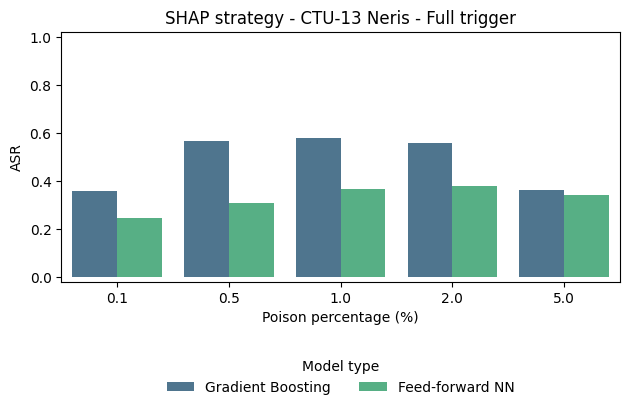

In [9]:
neris_gb_ft_shap_1 = neris_results_gb_1[((neris_results_gb_1["fstrat"] == "shap") & (neris_results_gb_1["trigger_type"] == "full"))]
neris_fn_ft_shap_1 = neris_results_fn_1[((neris_results_fn_1["fstrat"] == "shap") & (neris_results_fn_1["trigger_type"] == "full"))]

neris_compare_fstrat = pd.concat([neris_gb_ft_shap_1, neris_fn_ft_shap_1])
plot_strategy_comparison(neris_compare_fstrat, "shap", readable, "full")

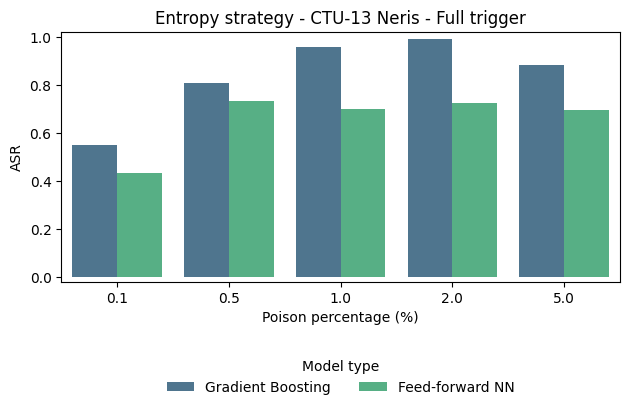

In [10]:
neris_gb_ft_entropy_1 = neris_results_gb_1[((neris_results_gb_1["fstrat"] == "entropy") & (neris_results_gb_1["trigger_type"] == "full"))]
neirs_fn_ft_entropy_1 = neris_results_fn_1[((neris_results_fn_1["fstrat"] == "entropy") & (neris_results_fn_1["trigger_type"] == "full"))]

neris_compare_fstrat = pd.concat([neris_gb_ft_entropy_1, neirs_fn_ft_entropy_1])
plot_strategy_comparison(neris_compare_fstrat, "entropy", readable, "full")

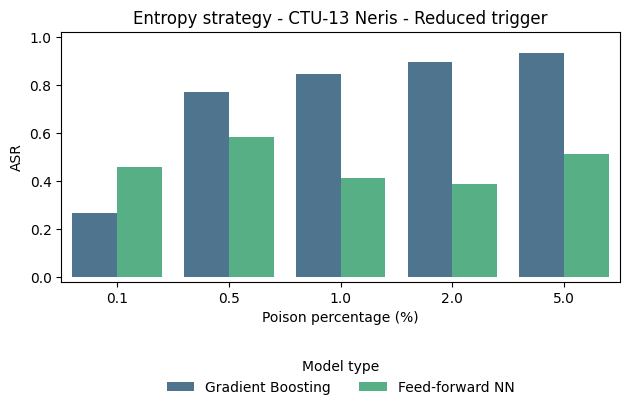

In [11]:
neris_gb_rt_entropy_1 = neris_results_gb_1[((neris_results_gb_1["fstrat"] == "entropy") & (neris_results_gb_1["trigger_type"] == "red"))]
neirs_fn_rt_entropy_1 = neris_results_fn_1[((neris_results_fn_1["fstrat"] == "entropy") & (neris_results_fn_1["trigger_type"] == "red"))]

neris_compare_fstrat_rt = pd.concat([neris_gb_rt_entropy_1, neirs_fn_rt_entropy_1])
plot_strategy_comparison(neris_compare_fstrat_rt, "entropy", readable, "red")

In [12]:
def plot_strategy_trigger_comparison(compare_fstrat: pd.DataFrame, fstrat:str, readable: dict, ds="neris", no_eb=True):
    if no_eb:
        eb = None
    else:
        eb = "se"
    sns.set(font_scale=0.8, rc={"figure.dpi":300}, style="whitegrid")


    compare_fstrat = compare_fstrat[compare_fstrat["Poison percentage (%)"] != 10.0]

    # Create two line plots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    axes = [ax1, ax2]
    model_order = ["GradientBoosting", "FFNN"]

    lps = []

    marks = ["o", "s", "^"]

    for i, model in enumerate(model_order):
        data = compare_fstrat[compare_fstrat["model"] == model]
        x_ticks = sorted(data["Poison percentage (%)"].unique())
    
        lp = sns.lineplot(
            x="Poison percentage (%)",
            y="poison_asr_poison",
            hue="trigger_type",
            data=data,
            # alpha=0.9,
            errorbar=eb,
            hue_order=["full", "red", "gen"],
            palette="rocket_r",
            # marker="o",
            linewidth=1.5,
            ax=axes[i],
            # legend=True
            style="trigger_type",
            markers=marks
        )

        lp.set_ylim(-0.02, 1.02)
        lp.set_ylabel(readable["poison_asr_poison"])
            
        # Set title
        lp.set_title(
            f"{readable[model]}"
        )
        # lp.set(xscale="log")
        lp.set_xticks(x_ticks)

        lps.append(lp)
    # plt.xscale("log")

    # Set global title
    # fig.suptitle("Trigger Effectiveness Comparison")

    sns.despine(left=True, right=True)

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines_labels = lines_labels[-1:]
    for lp in lps:
        lp.get_legend().remove()
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    labels = [readable[l] for l in labels]

    # Set legend title    
    leg = fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3, frameon=False)
    leg.set_title("")

    plt.tight_layout()
    plt.show()

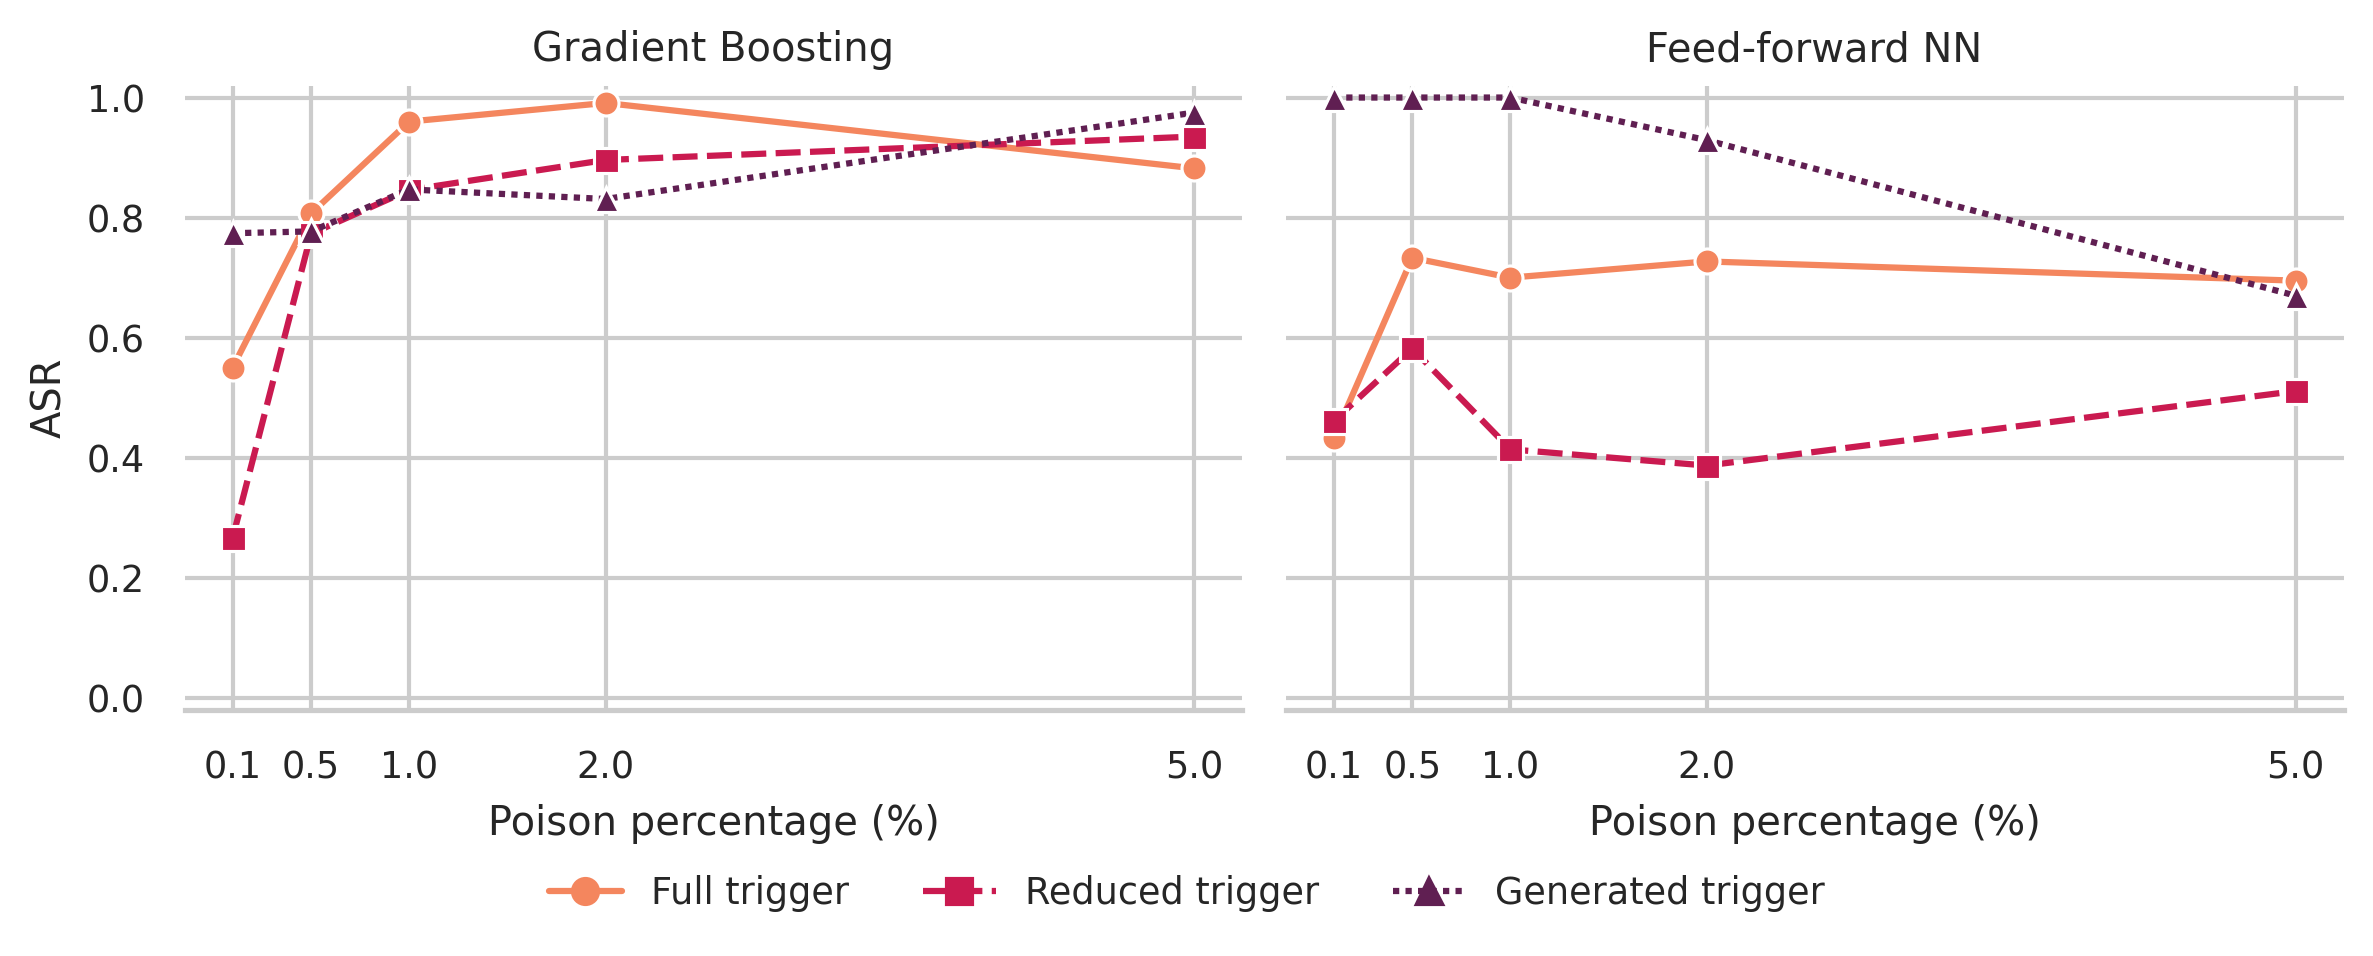

In [20]:
# Entropy strategy, FFNN vs. GB, full trigger vs. red trigger
neris_gb_ft_entropy_1 = neris_results_gb_1[((neris_results_gb_1["fstrat"] == "entropy") & (neris_results_gb_1["trigger_type"] == "full"))]
neirs_fn_ft_entropy_1 = neris_results_fn_1[((neris_results_fn_1["fstrat"] == "entropy") & (neris_results_fn_1["trigger_type"] == "full"))]
neris_gb_rt_entropy_1 = neris_results_gb_1[((neris_results_gb_1["fstrat"] == "entropy") & (neris_results_gb_1["trigger_type"] == "red"))]
neirs_fn_rt_entropy_1 = neris_results_fn_1[((neris_results_fn_1["fstrat"] == "entropy") & (neris_results_fn_1["trigger_type"] == "red"))]
neirs_gb_gt_entropy_1 = neris_results_gb_1[((neris_results_gb_1["fstrat"] == "entropy") & (neris_results_gb_1["trigger_type"] == "gen"))]
neirs_fn_gt_entropy_1 = neris_results_fn_1[((neris_results_fn_1["fstrat"] == "entropy") & (neris_results_fn_1["trigger_type"] == "gen"))]

compare_df = pd.concat([neris_gb_ft_entropy_1, neirs_fn_ft_entropy_1, neris_gb_rt_entropy_1, neirs_fn_rt_entropy_1, neirs_gb_gt_entropy_1, neirs_fn_gt_entropy_1])
plot_strategy_trigger_comparison(compare_df, "entropy", readable, no_eb=True)

In [16]:
compare_df["Trigger size (connections) before"] = [i[0] for i in compare_df["trig_shape_before"]]
compare_df_red = compare_df[compare_df["trigger_type"] == "red"]
trig_size_diff = compare_df_red["Trigger size (connections) before"] - compare_df_red["Trigger size (connections)"]
print("Average trigger size difference: {}".format(trig_size_diff.mean()))
print("Average trigger size difference (absolute): {}".format(trig_size_diff.abs().mean()))
print("Standard deviation of trigger size difference: {}".format(trig_size_diff.std()))

Average trigger size difference: 17.0
Average trigger size difference (absolute): 17.0
Standard deviation of trigger size difference: 18.811633395864597


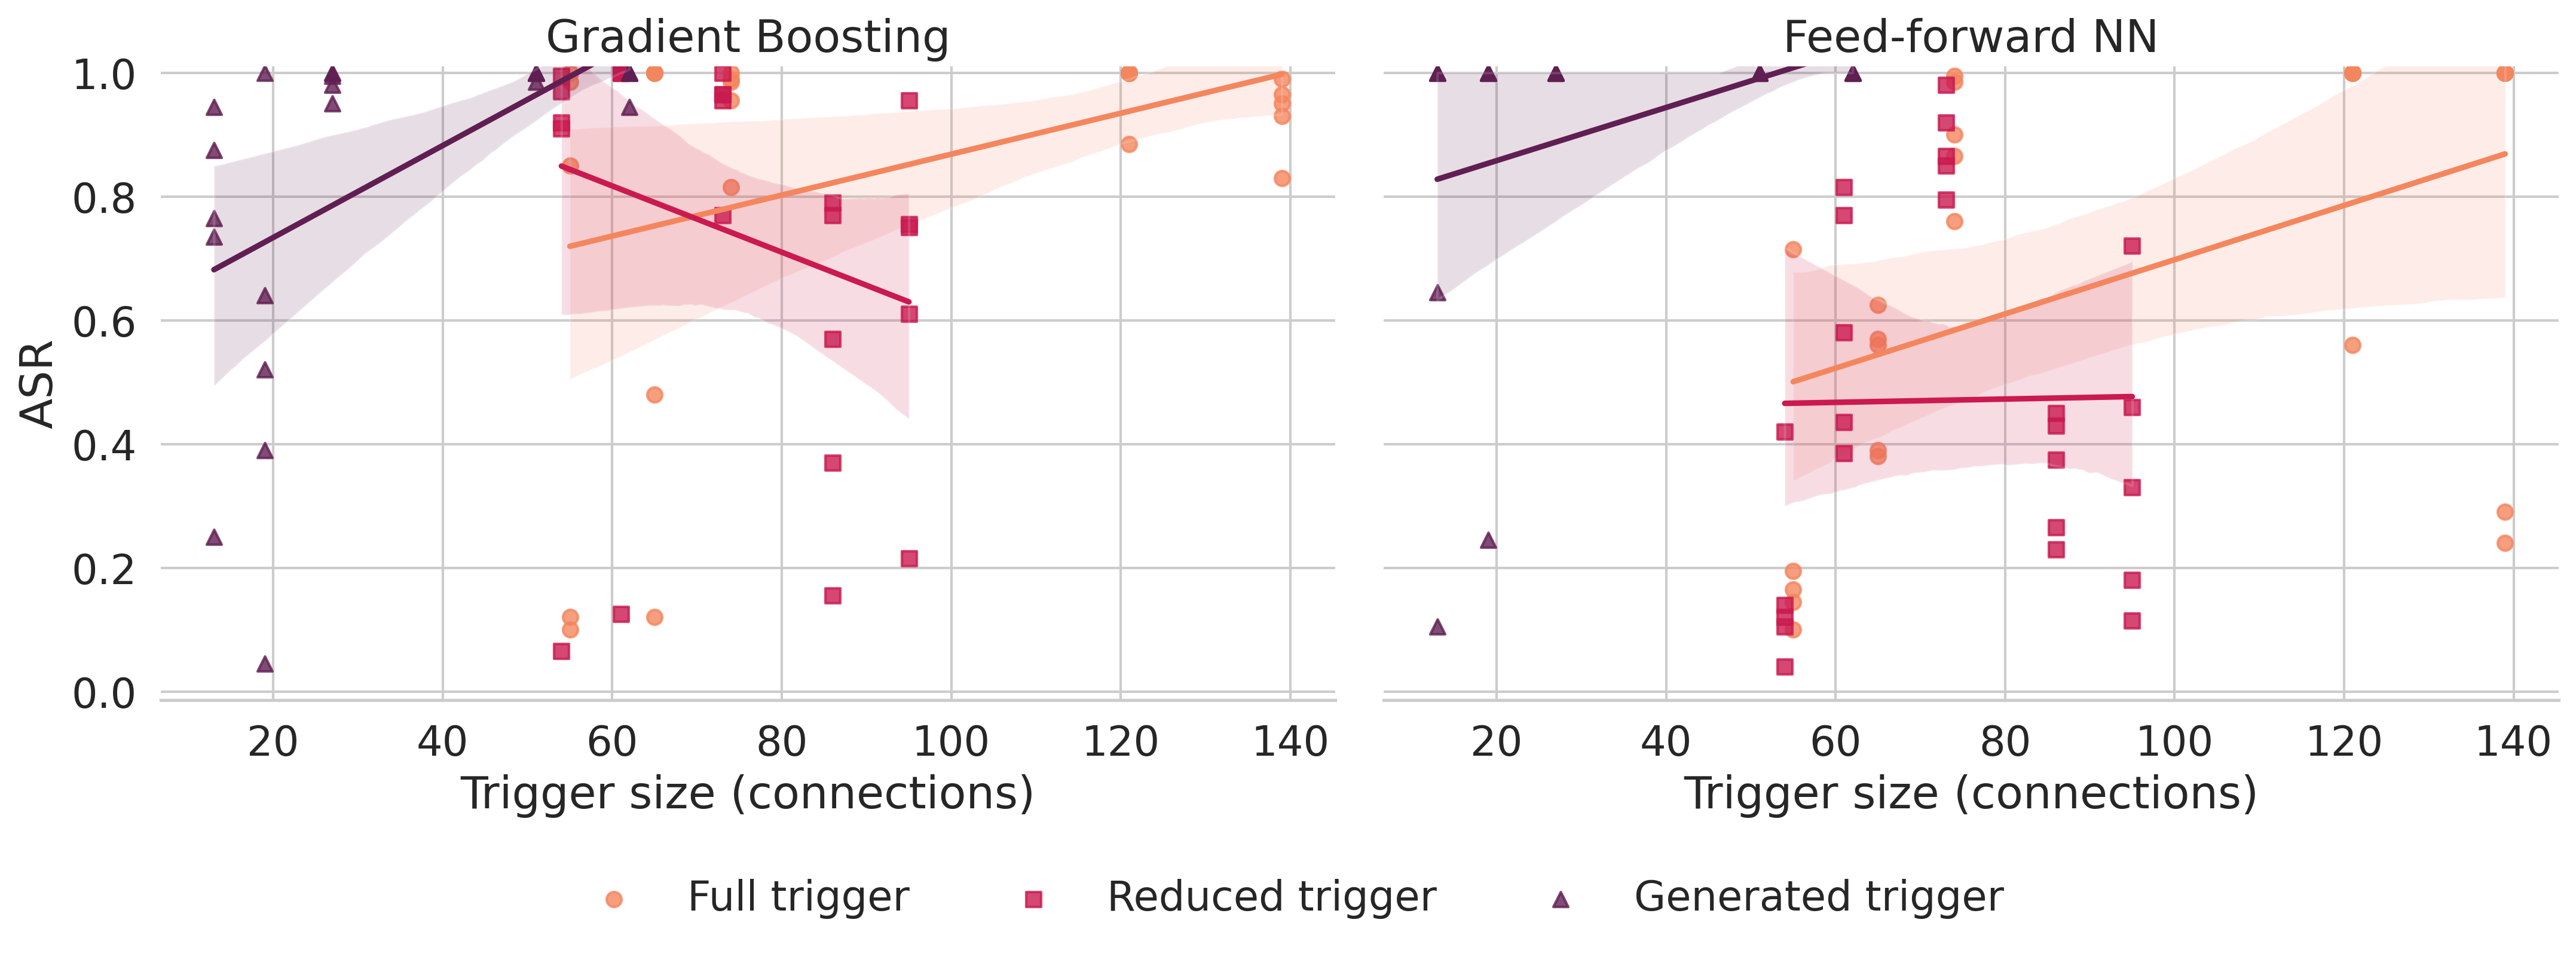

In [17]:
# Also show correlation between the trigger size and the ASR for the entropy strategy on both models with both triggers
sns.set(font_scale=1.5, rc={"figure.dpi":300}, style="whitegrid")

lp = sns.lmplot(
    data=compare_df,
    x="Trigger size (connections)",
    y="poison_asr_poison",
    hue="trigger_type",
    col="model",
    col_wrap=2,
    palette="rocket_r",
    # legend=False,
    facet_kws={'legend_out': True},
    height=5,
    aspect=1.3,
    hue_order=["full", "red", "gen"],
        markers=["o", "s", "^"]
)
plt.ylim(top=1.01)
lp.set_axis_labels("Trigger size (connections)", readable["poison_asr_poison"])

# Format legend
# leg = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
leg = lp._legend
# leg.set_title(readable["fstrat"])
texts_to_change = [readable[t.get_text()] for t in leg.texts]
for t, l in zip(leg.texts, texts_to_change):
    t.set_text(l)
leg.set_title("")
sns.move_legend(lp, "lower center", bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

sns.despine(left=True, right=True)

# Set titles
for ax in lp.axes:
    ax.set_title(readable[ax.get_title()])

# lp.fig.suptitle("Attack Success as a Function of Trigger Size")
plt.tight_layout()
    
plt.show()


In [18]:
assert False

AssertionError: 

## Baseline

In [22]:
from poisnet import constants, data_utils

In [23]:
all_res = pd.concat([neris_results_fn_1, neris_results_gb_1])

In [24]:
ref_f1s = {
    "neris": {1: {"GradientBoosting": 0.9590540256523703, "FFNN": 0.9269868413691503}},
    "cicids_botnet": {
        "botnet": {"GradientBoosting": 0.9936391135214663, "FFNN": 0.9949295626960601}
    },
    "iscx": {
        "chat_video": {
            "GradientBoosting": 0.9006942331155736,
            "FFNN": 0.9187867946007481,
        },
        "file_video": {
            "GradientBoosting": 0.8003810852662347,
            "FFNN": 0.718457563347224,
        },
    },
}


In [25]:
both_grps = all_res.groupby(by=["scenario", "subscenario", "model", "fstrat", "Poison percentage (%)", "trigger_type"]).agg({"poison_f1_test": ["mean", "std"]})
display(both_grps)

poison_f1_test  \
                                                                                           mean   
scenario subscenario model            fstrat  Poison percentage (%) trigger_type                  
neris    1           FFNN             entropy 0.1                   full               0.910704   
                                                                    gen                0.937831   
                                                                    red                0.914978   
                                              0.5                   full               0.889674   
                                                                    gen                0.932886   
...                                                                                         ...   
                     GradientBoosting shap    2.0                   gen                0.961507   
                                                                    red                0.961306   
                                              5.0                   full               0.970839   
                                                                    gen                0.966662   
                                                                    red                0.961781   

                                                                                            
                                                                                       std  
scenario subscenario model            fstrat  Poison percentage (%) trigger_type            
neris    1           FFNN             entropy 0.1                   full          0.016060  
                                                                    gen           0.009068  
                                                                    red           0.009246  
                                              0.5                   full          0.047421  
                                                                    gen           0.005888  
...                                                                                    ...  
                     GradientBoosting shap    2.0                   gen           0.014149  
                                                                    red           0.011729  
                                              5.0                   full          0.003859  
                                                                    gen           0.015967  
                                                                    red           0.012245  

[100 rows x 2 columns]

In [26]:
f1_deltas = []
for row in both_grps.iterrows():
    cur_scenario = row[0][0]
    cur_subscenario = row[0][1]
    cur_model = row[0][2]
    new_f1 = row[1][("poison_f1_test", "mean")]
    old_f1 = ref_f1s[cur_scenario][cur_subscenario][cur_model]
    delta = new_f1 - old_f1
    f1_deltas.append(delta)

both_grps["f1_delta"] = f1_deltas

In [28]:
both_grps["f1_delta"].max()

0.013923748672469705

In [29]:
both_grps["f1_delta"].min()

-0.05044610202693112

In [30]:
display(both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "fstrat", "trigger_type", ]).agg(["mean", "std"]))
display(both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "fstrat", "trigger_type", ]).agg(["mean", "std"]).min())
display(both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "fstrat", "trigger_type", ]).agg(["mean", "std"]).max())

mean       std
scenario subscenario model            fstrat  trigger_type                    
neris    1           FFNN             entropy full         -0.032988  0.012453
                                              gen           0.003767  0.005848
                                              red          -0.016945  0.004132
                                      gini    full         -0.037046  0.007600
                                              red          -0.036612  0.004999
                                      random  full         -0.006255  0.006092
                                              red           0.003520  0.006473
                                      shap    full         -0.007516  0.005746
                                              gen           0.006392  0.007463
                                              red           0.001363  0.011256
                     GradientBoosting entropy full         -0.003818  0.004500
                                              gen           0.008108  0.004653
                                              red          -0.008747  0.003467
                                      gini    full         -0.004536  0.003822
                                              red          -0.007473  0.002174
                                      random  full          0.002926  0.002949
                                              red           0.002992  0.004856
                                      shap    full          0.009003  0.007050
                                              gen           0.002647  0.003024
                                              red           0.001192  0.001455

mean   -0.037046
std     0.001455
dtype: float64

mean    0.009003
std     0.012453
dtype: float64

In [31]:
display(both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "Poison percentage (%)", "trigger_type", ]).agg(["mean", "std"]))
display(both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "Poison percentage (%)", "trigger_type", ]).agg(["mean", "std"]).min())
display(both_grps["f1_delta"].groupby(by=["scenario", "subscenario", "model", "Poison percentage (%)", "trigger_type", ]).agg(["mean", "std"]).max())

mean  \
scenario subscenario model            Poison percentage (%) trigger_type             
neris    1           FFNN             0.1                   full         -0.013659   
                                                            gen           0.008042   
                                                            red          -0.010011   
                                      0.5                   full         -0.021746   
                                                            gen           0.007868   
                                                            red          -0.011645   
                                      1.0                   full         -0.019107   
                                                            gen           0.005638   
                                                            red          -0.013806   
                                      2.0                   full         -0.018978   
                                                            gen           0.009298   
                                                            red          -0.006934   
                                      5.0                   full         -0.031266   
                                                            gen          -0.005448   
                                                            red          -0.018446   
                     GradientBoosting 0.1                   full         -0.001144   
                                                            gen           0.005237   
                                                            red          -0.003133   
                                      0.5                   full          0.004338   
                                                            gen           0.005976   
                                                            red          -0.003983   
                                      1.0                   full          0.001391   
                                                            gen           0.007541   
                                                            red          -0.002358   
                                      2.0                   full          0.000065   
                                                            gen           0.003204   
                                                            red          -0.002503   
                                      5.0                   full         -0.000182   
                                                            gen           0.004929   
                                                            red          -0.003069   

                                                                               std  
scenario subscenario model            Poison percentage (%) trigger_type            
neris    1           FFNN             0.1                   full          0.017282  
                                                            gen           0.003963  
                                                            red           0.016069  
                                      0.5                   full          0.017973  
                                                            gen           0.002785  
                                                            red           0.024386  
                                      1.0                   full          0.010470  
                                                            gen           0.005328  
                                                            red           0.018072  
                                      2.0                   full          0.017825  
                                                            gen           0.005793  
                                                            red           0.022072  
                                      5.0                   full          0.020951  
                                                  

mean   -0.031266
std     0.000662
dtype: float64

mean    0.009298
std     0.024386
dtype: float64

In [35]:
sel_full = both_grps.reset_index()
sel_full = sel_full[sel_full["trigger_type"] == "full"]
# display(sel_full)

In [36]:
# flatten sel_full
sel_full_flat = sel_full.copy()
sel_full_flat.columns = ["_".join(col) for col in sel_full_flat.columns]
sel_full_flat = sel_full_flat.rename(columns={"Poison percentage (%)_": "Poison percentage (%)"})
sel_full_flat = sel_full_flat.rename(columns={"poison_f1_test_mean": "poison_f1_test"})
sel_full_flat = sel_full_flat.rename(columns={"poison_f1_test_std": "poison_f1_test_std"})
sel_full_flat = sel_full_flat.rename(columns={"f1_delta_": "f1_delta"})
# display(sel_full_flat)


In [34]:
sel_full_flat.groupby(by=["scenario_", "subscenario_", "model_", "fstrat_", "trigger_type_"]).agg({"f1_delta": ["mean"]})

f1_delta
                                                                   mean
scenario_ subscenario_ model_           fstrat_ trigger_type_          
neris     1            FFNN             entropy full          -0.032988
                                        gini    full          -0.037046
                                        random  full          -0.006255
                                        shap    full          -0.007516
                       GradientBoosting entropy full          -0.003818
                                        gini    full          -0.004536
                                        random  full           0.002926
                                        shap    full           0.009003